In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Problem Statement

to predict insurance premium according to age

In [5]:
df = pd.read_csv("simplelinearregression.csv")
df

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [7]:
df.isna().sum()

Age        0
Premium    0
dtype: int64

In [9]:
df.nunique()

Age        7
Premium    7
dtype: int64

# Feature Selection

In [12]:
df.corr()

,Age,Premium
Age,1.000000,0.984332
Premium,0.984332,1.000000


<AxesSubplot:>

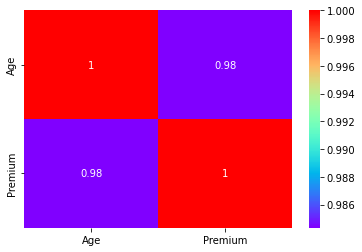

In [14]:
sns.heatmap(df.corr(),annot = True,cmap = "rainbow")

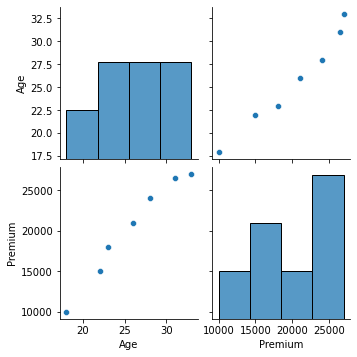

In [15]:
sns.pairplot(df)

# Train Test Split

In [16]:
x = df.drop("Premium",axis=1)
x

,Age
0,18
1,22
2,23
3,26
4,28
5,31
6,33


In [18]:
y = df["Premium"]
y

0    10000
1    15000
2    18000
3    21000
4    24000
5    26500
6    27000
Name: Premium, dtype: int64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)
x_train

,Age
4,28
6,33
5,31
2,23
1,22


In [20]:
x_train

,Age
4,28
6,33
5,31
2,23
1,22


In [21]:
x_test

,Age
0,18
3,26


In [22]:
lr_model= LinearRegression()

In [38]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = lr_model.predict(x_test)
y_pred[0:5]

array([11933.47639485, 20585.83690987])

In [26]:
y_test[0:5]

0    10000
3    21000
Name: Premium, dtype: int64

In [25]:
residual= y_test-y_pred

In [28]:
mse=mean_squared_error(y_test,y_pred)

In [29]:
mse

1954931.0173331613

In [31]:
rmse=np.sqrt(mse)
rmse

1398.188477042048

In [32]:
r2 = r2_score(y_test,y_pred)
print("R2 is: ",r2)

R2 is:  0.9353741812451848


In [33]:
lr_model.score(x_test,y_test)

0.9353741812451848

In [34]:
lr_model.score(x_train,y_train)

0.9546387258254849

In [35]:
adjusted_r2= 1-(1-r2)*(x.shape[0]-1)/(x.shape[0]-x.shape[1]-1)
adjusted_r2

0.9224490174942217

In [39]:
MAE = mean_absolute_error(y_test,y_pred)

In [40]:
MAE

1173.8197424892696